## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, we will further investigate some comparisons between our personal logistic regression implementation, that of sci-kit learn and further tuning parameters that can be adjusted in the model.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, we were able to recreat a logistic regression model output from sci-kit learn that did not include an intercept of regularization. Here, you will continue to analyze the impact of several tuning parameters including the intercept, and regularization parameter which we have not discussed previously.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [10]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implementk a standard train-test split.  
**For consistency of results, use random_state=17.**

In [11]:
y = df.target
X = df.drop(columns=['target'])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [13]:
import numpy as np

import numpy as np

def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights = initial_weights
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        #Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
    #Return finalized Weights
    return weights

weights = grad_desc(X_train, y_train, 50000, 0.001)

## Now use your algorithm to make [probability] predictions on the test set

In [14]:
y_hat_test = sigmoid(np.dot(X_test, weights))
print([round(yi, 2) for yi in y_hat_test])

[0.0, 0.69, 0.59, 0.02, 0.05, 0.39, 0.07, 0.04, 0.0, 0.0, 0.9, 0.99, 0.01, 0.88, 1.0, 0.64, 0.02, 0.65, 0.0, 0.9, 0.89, 0.24, 0.0, 0.01, 0.87, 0.32, 0.36, 0.4, 1.0, 0.69, 0.82, 0.0, 1.0, 0.71, 0.98, 0.52, 0.0, 0.84, 0.01, 0.44, 0.22, 0.94, 0.33, 0.01, 0.53, 0.24, 0.96, 0.6, 0.08, 0.92, 0.78, 0.59, 1.0, 0.32, 1.0, 0.1, 0.99, 0.99, 0.69, 1.0, 0.81, 1.0, 0.94, 0.86, 0.82, 0.55, 0.87, 0.15, 0.58, 0.78, 0.24, 0.99, 0.49, 0.01, 0.03, 0.78, 0.83, 0.5, 0.92, 0.17, 0.0, 0.0, 0.03, 0.71, 0.03, 0.68, 0.0, 0.48, 0.74, 0.0, 0.01, 0.29, 0.05, 0.05, 0.97, 0.0, 0.0, 0.01, 0.98, 0.0, 0.0, 1.0, 0.0, 0.72, 0.18, 0.39, 0.98, 0.96, 0.8, 0.84, 0.03, 0.29, 0.27, 0.02, 0.01, 0.03, 0.18, 0.75, 0.86, 0.43, 1.0, 0.89, 0.86, 0.09, 0.62, 0.97, 0.35, 0.11, 1.0, 0.99, 0.99, 0.0, 0.87, 0.93, 0.65, 0.05, 0.6, 1.0, 0.04, 0.04, 0.63, 0.13, 0.97, 0.91, 0.78, 0.94, 0.91, 0.95, 0.99, 1.0, 0.99, 1.0, 0.68, 0.02, 0.64, 0.99, 0.03, 0.36, 0.0, 0.99, 0.08, 1.0, 0.4, 0.97, 0.0, 0.45, 0.51, 0.01, 1.0, 0.89, 1.0, 0.87, 1.0, 0.27, 

## Create an ROC curve for your predictions

AUC Score: 0.8813


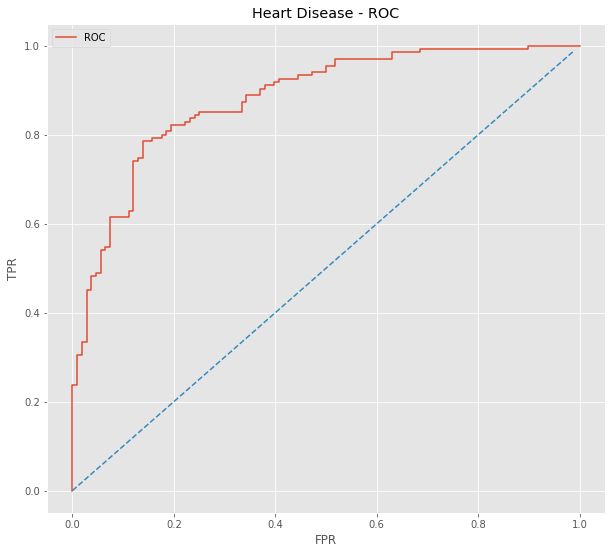

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)
print(f'AUC Score: {auc(fpr, tpr):.4}')

plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, label='ROC')
plt.plot(np.arange(0, 1, .01), np.arange(0,1,.01), ls='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Heart Disease - ROC')
plt.legend()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

Test AUC Score: 0.8813
Train AUC Score: 0.9578


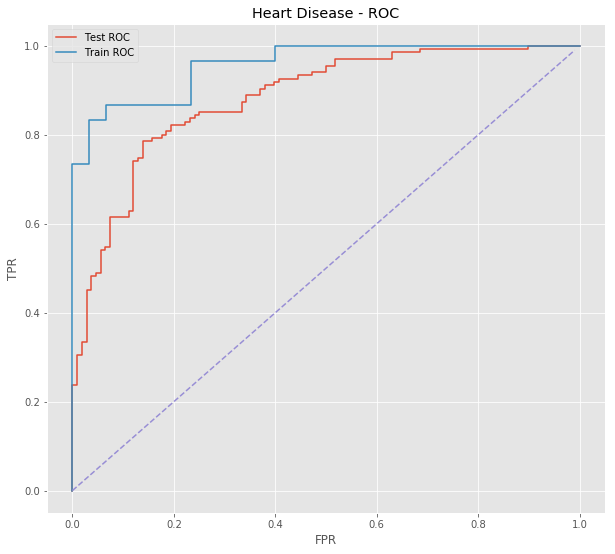

In [33]:
y_hat_train = sigmoid(np.dot(X_train, weights))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)

print(f'Test AUC Score: {auc(fpr, tpr):.4}')
print(f'Train AUC Score: {auc(train_fpr, train_tpr):.4}')

plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, label='Test ROC')
plt.plot(train_fpr, train_tpr, label='Train ROC')
plt.plot(np.arange(0, 1, .01), np.arange(0,1,.01), ls='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Heart Disease - ROC')
plt.legend()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

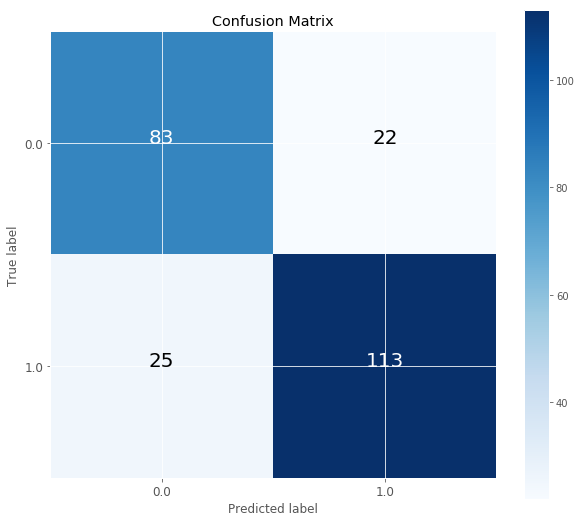

In [41]:
import itertools

def binary_prediction(probabilities, threshold=.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
    return classes

test_predictions = binary_prediction(y_hat_test)


from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_predictions, y_test)

plt.figure(figsize=(10, 9))
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, size=12)#, rotation=45)
plt.yticks(tick_marks, class_names, size=12)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black", size=20)

#Add a Side Bar Legend Showing Colors
plt.colorbar()

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e16)
logreg_int = LogisticRegression(fit_intercept=True, C=1e16)

logreg.fit(X_train, y_train)
y_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

logreg_int.fit(X_train, y_train)
yint_score = logreg_int.decision_function(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Create an ROC Curve for the sci-kit learn model

Test AUC Score: 0.8842
Train AUC Score: 0.9589
AUC Score (with Intercept): 0.8849


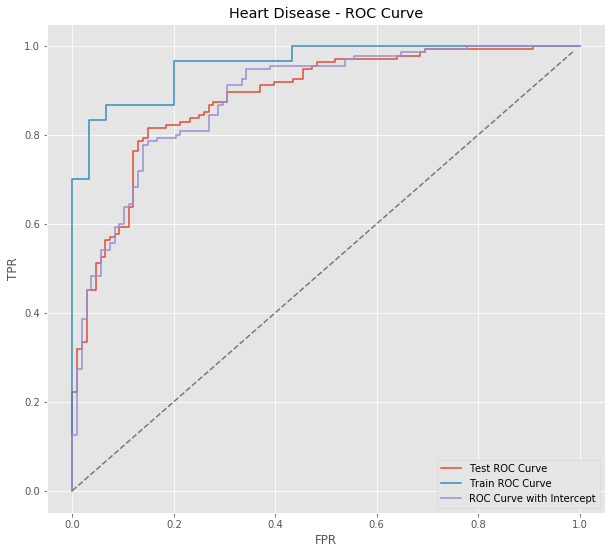

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
train_fpr, train_tpr, train_thresh = roc_curve(y_train, y_train_score)
int_fpr, int_tpr, int_thresh = roc_curve(y_test, yint_score)

print(f'Test AUC Score: {auc(fpr, tpr):.4}')
print(f'Train AUC Score: {auc(train_fpr, train_tpr):.4}')
print(f'AUC Score (with Intercept): {auc(int_fpr, int_tpr):.4}')

plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, label='Test ROC Curve')
plt.plot(train_fpr, train_tpr, label = 'Train ROC Curve')
plt.plot(int_fpr, int_tpr, label='ROC Curve with Intercept')
plt.plot(np.arange(0, 1, .01), np.arange(0,1, .01), ls='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Heart Disease - ROC Curve')
plt.legend()
plt.show()

## As before add an ROC curve to the graph for the train set as well

Train AUC Score (No Intercept): 0.9589
Test AUC Score (No Intercept): 0.8826
Train AUC Score (With Intercept): 0.9556
Test AUC Score (With Intercept): 0.8901


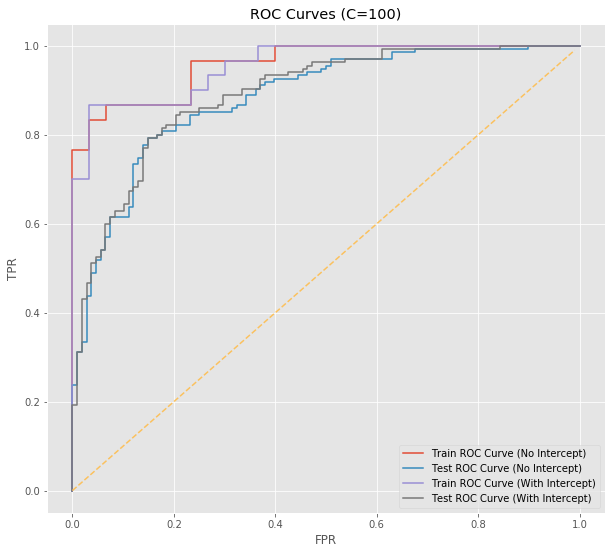

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8835
Train AUC Score (With Intercept): 0.9578
Test AUC Score (With Intercept): 0.8883


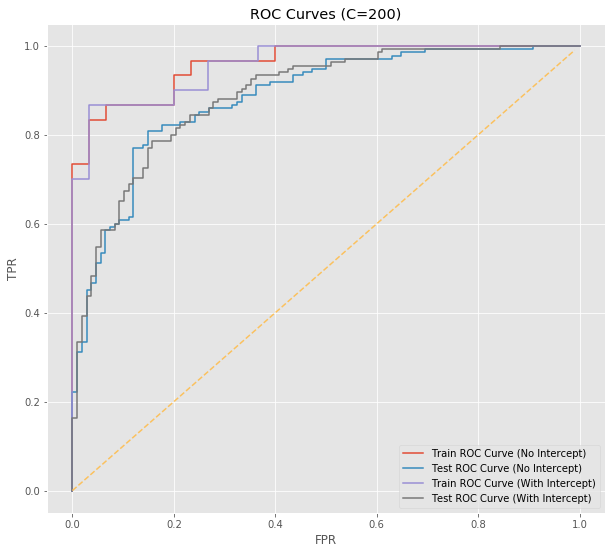

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8839
Train AUC Score (With Intercept): 0.9578
Test AUC Score (With Intercept): 0.8880


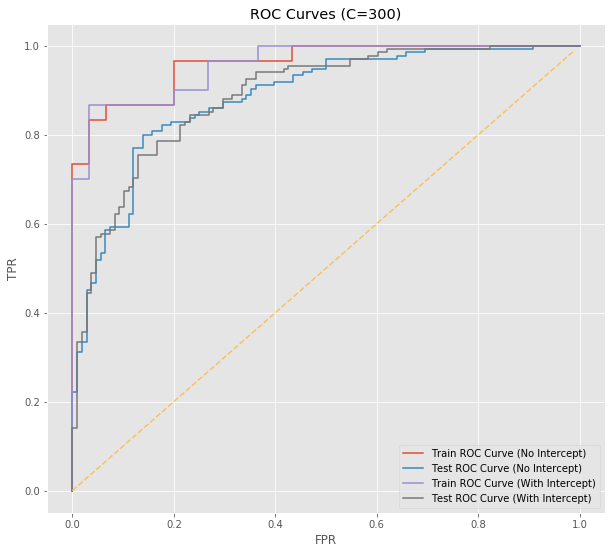

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8843
Train AUC Score (With Intercept): 0.9578
Test AUC Score (With Intercept): 0.8873


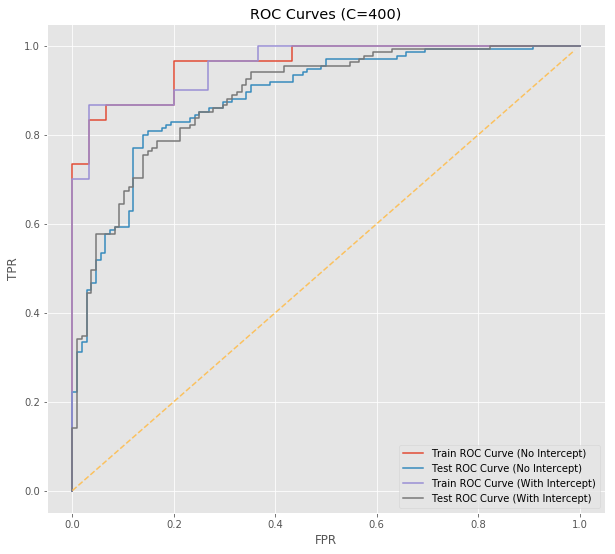

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8844
Train AUC Score (With Intercept): 0.9578
Test AUC Score (With Intercept): 0.8871


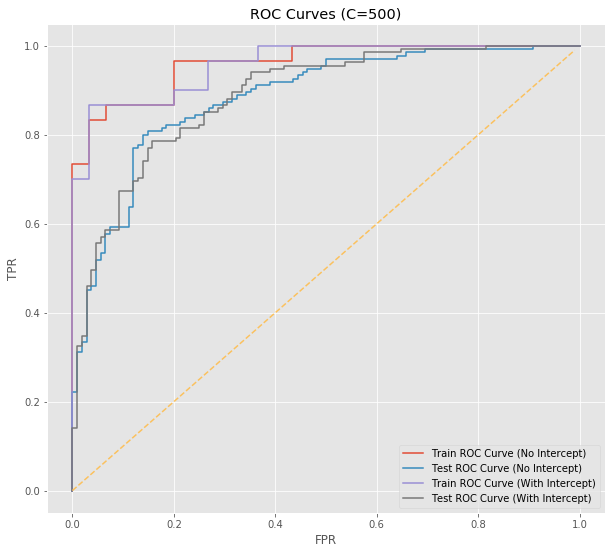

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8844
Train AUC Score (With Intercept): 0.9578
Test AUC Score (With Intercept): 0.8870


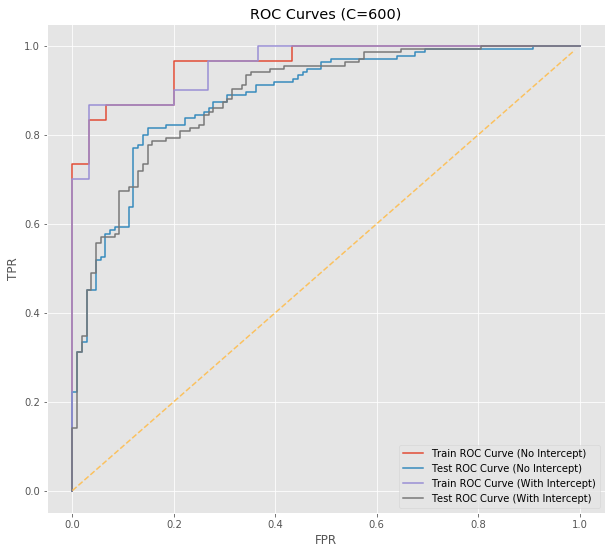

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8845
Train AUC Score (With Intercept): 0.9578
Test AUC Score (With Intercept): 0.8859


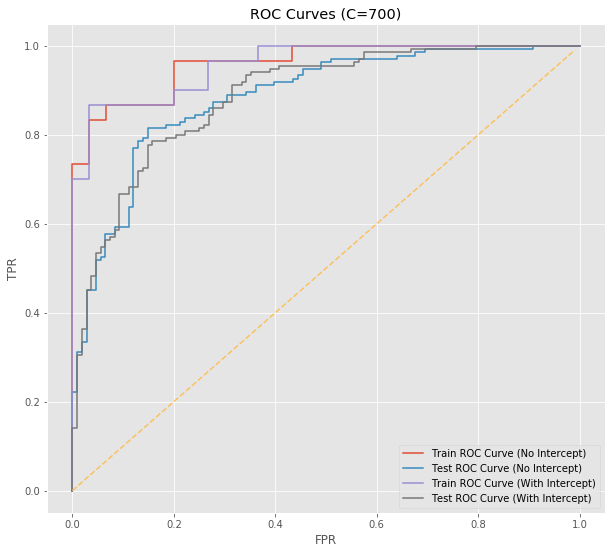

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9578
Test AUC Score (With Intercept): 0.8850


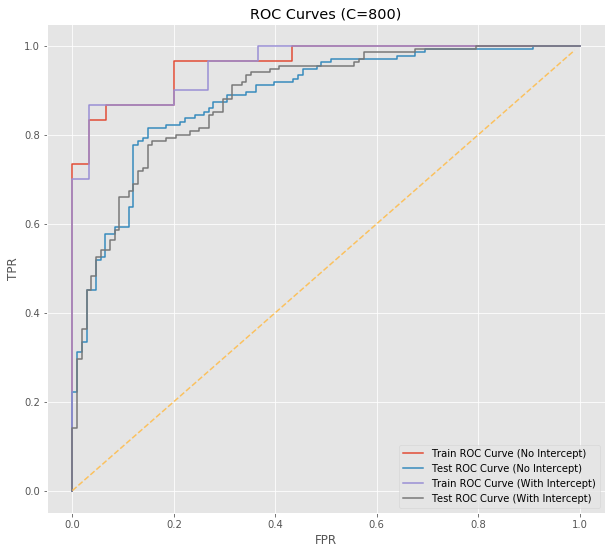

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8848


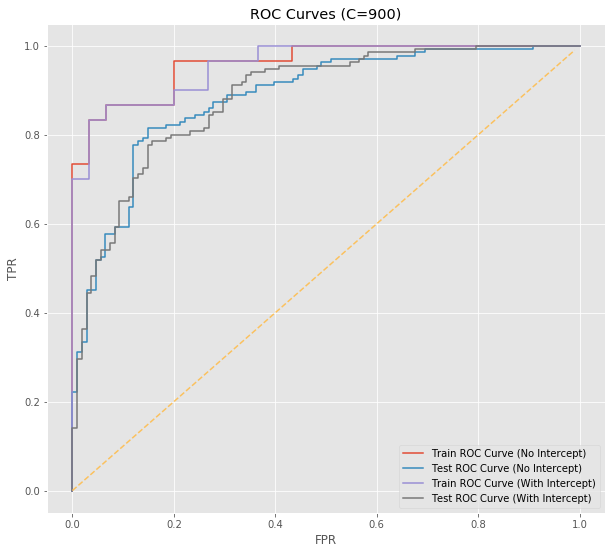

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8847


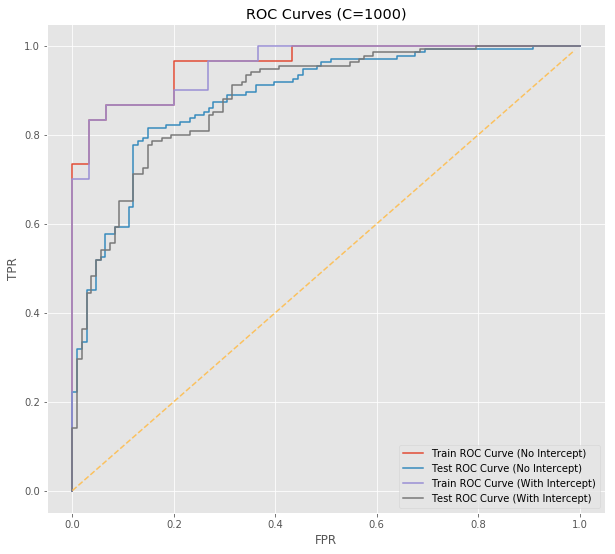

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8849


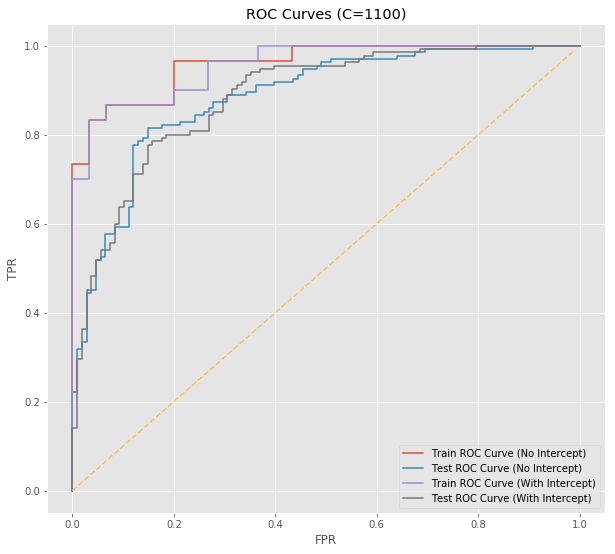

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8851


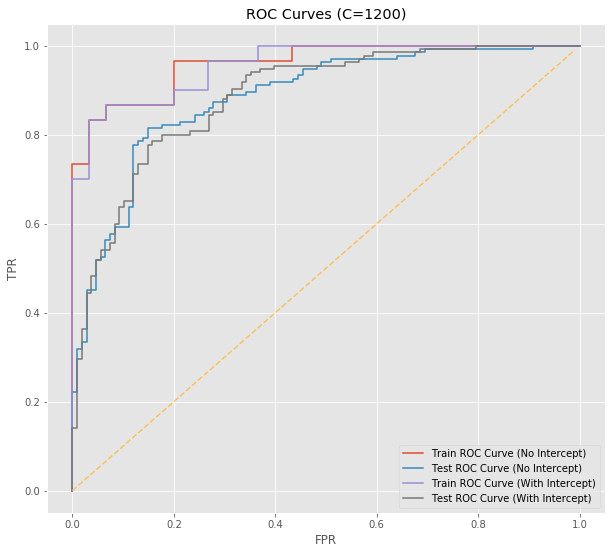

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8847
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8854


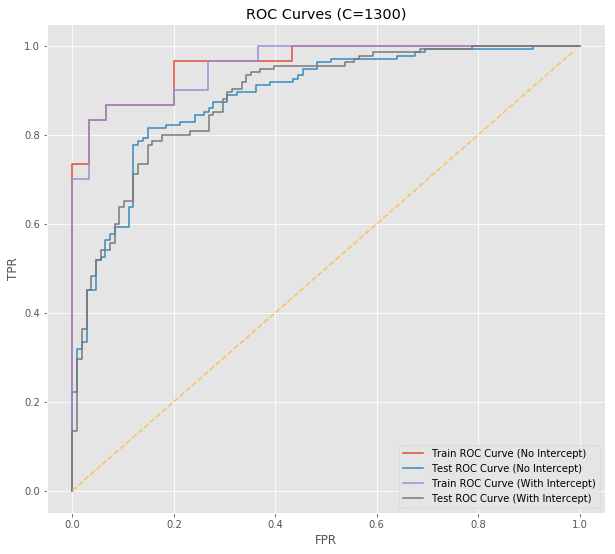

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8847
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8854


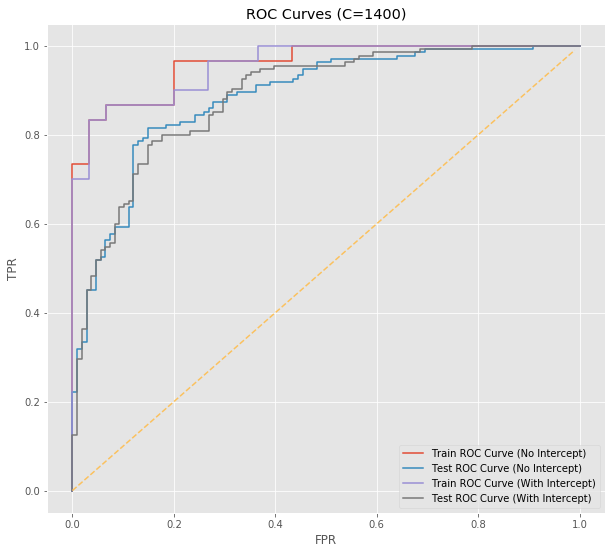

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8854


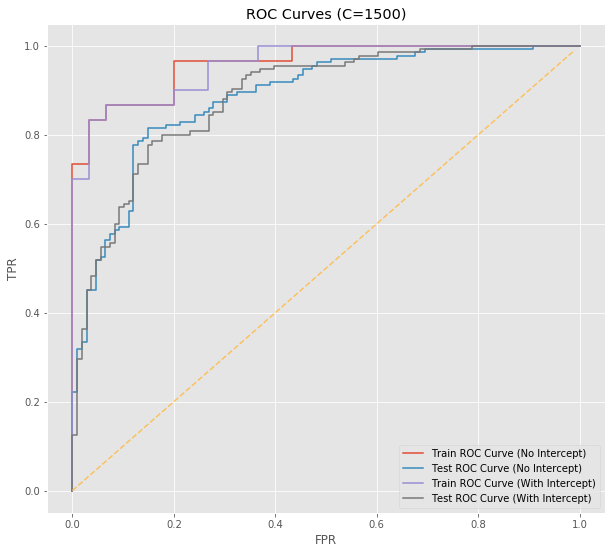

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8853


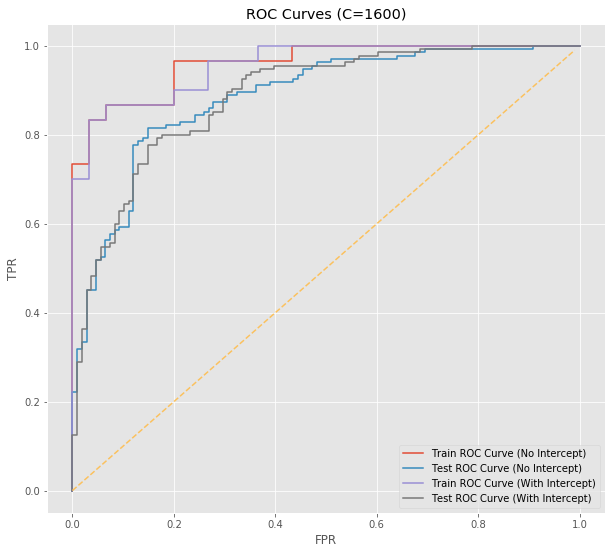

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8847
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8855


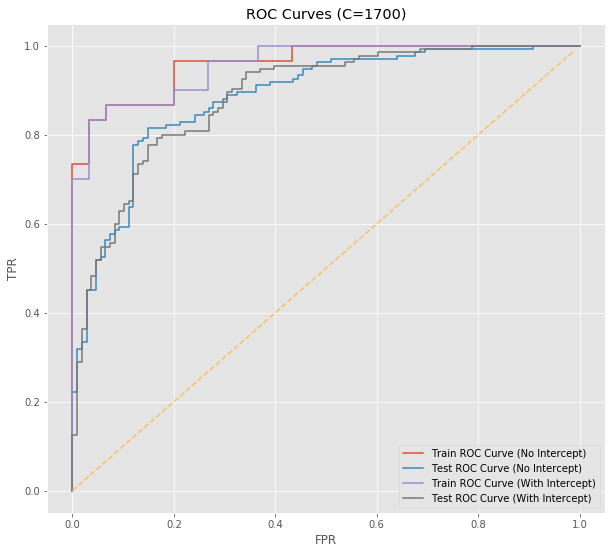

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8857


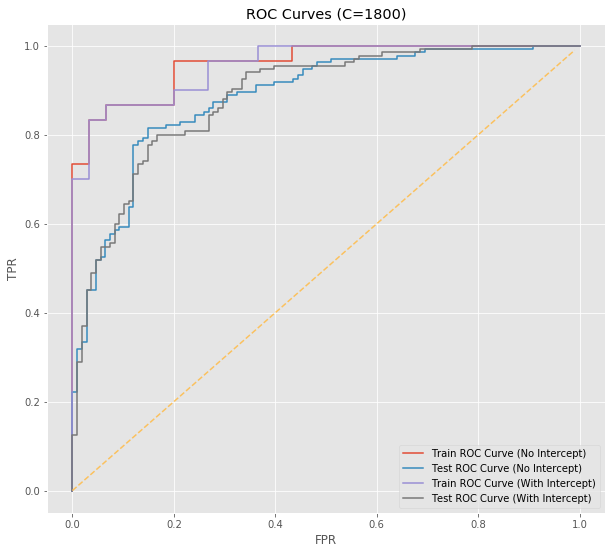

Train AUC Score (No Intercept): 0.9600
Test AUC Score (No Intercept): 0.8846
Train AUC Score (With Intercept): 0.9567
Test AUC Score (With Intercept): 0.8857


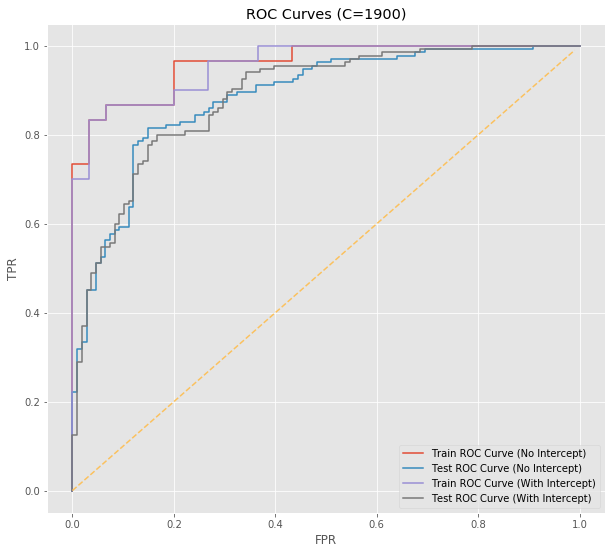

Top AUC Score: 0.8912
Fitted Intercept: Yes
C Value: 62


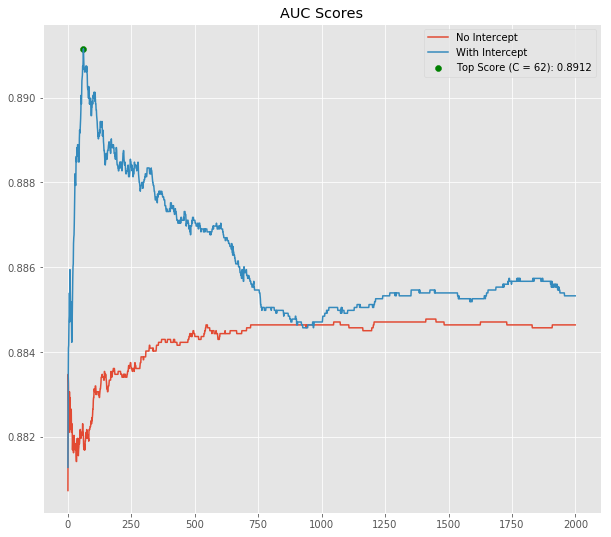

In [88]:
import warnings
warnings.simplefilter('ignore')

C_vals = list(np.arange(1, 2000, 1))
top_score = {'C': 1, 'Fit Intercept': 'No', 'AUC Score': 0}
C_with_int = []
C_no_int = []

for val in C_vals:
    # Fit Models
    logreg = LogisticRegression(fit_intercept=False, C=val)
    logregi = LogisticRegression(fit_intercept=True, C=val)
    logreg.fit(X_train, y_train)
    logregi.fit(X_train, y_train)
    
    # Get Scores
    y_train_score = logreg.decision_function(X_train)
    y_test_score = logreg.decision_function(X_test)
    yi_train_score = logregi.decision_function(X_train)
    yi_test_score = logregi.decision_function(X_test)
    
    # Create ROC Curves
    y_train_fpr, y_train_tpr, y_train_thresh = roc_curve(y_train, y_train_score)
    y_test_fpr, y_test_tpr, y_test_thresh = roc_curve(y_test, y_test_score)
    yi_train_fpr, yi_train_tpr, yi_train_thresh = roc_curve(y_train, yi_train_score)
    yi_test_fpr, yi_test_tpr, yi_test_thresh = roc_curve(y_test, yi_test_score)
    
    # Print AUC Scores
    if val%100 == 0:
        print(f'Train AUC Score (No Intercept): {auc(y_train_fpr, y_train_tpr):.4f}')
        print(f'Test AUC Score (No Intercept): {auc(y_test_fpr, y_test_tpr):.4f}')
        print(f'Train AUC Score (With Intercept): {auc(yi_train_fpr, yi_train_tpr):.4f}')
        print(f'Test AUC Score (With Intercept): {auc(yi_test_fpr, yi_test_tpr):.4f}')
    
    # Check top score
    auc_y = auc(y_test_fpr, y_test_tpr)
    auc_yi = auc(yi_test_fpr, yi_test_tpr)
    C_no_int.append(auc_y)
    C_with_int.append(auc_yi)
    
    if auc_y > top_score['AUC Score']:
        top_score['C'] = val
        top_score['Fit Intercept'] = 'No'
        top_score['AUC Score'] = auc_y
        
    if auc_yi > top_score['AUC Score']:
        top_score['C'] = val
        top_score['Fit Intercept'] = 'Yes'
        top_score['AUC Score'] = auc_yi
        
    
    # Plot ROC Curves
    if val%100 == 0:
        plt.figure(figsize=(10, 9))

        plt.plot(y_train_fpr, y_train_tpr, label='Train ROC Curve (No Intercept)')
        plt.plot(y_test_fpr, y_test_tpr, label='Test ROC Curve (No Intercept)')
        plt.plot(yi_train_fpr, yi_train_tpr, label='Train ROC Curve (With Intercept)')
        plt.plot(yi_test_fpr, yi_test_tpr, label='Test ROC Curve (With Intercept)')

        plt.plot(np.arange(0, 1, .01), np.arange(0, 1, .01), ls='--')

        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title(f'ROC Curves (C={val})')
        plt.legend()
        plt.show()

    
print(f'Top AUC Score: {top_score["AUC Score"]:.4f}')
print(f'Fitted Intercept: {top_score["Fit Intercept"]}')
print(f'C Value: {top_score["C"]}')

plt.figure(figsize=(10, 9))
plt.plot(np.arange(1, 2000, 1), 
         C_no_int, 
         label='No Intercept')
plt.plot(np.arange(1, 2000, 1), 
         C_with_int, 
         label='With Intercept')
plt.scatter(top_score['C'], top_score['AUC Score'], 
           c='green', 
           label=f"Top Score (C = {top_score['C']}): {top_score['AUC Score']:.4f}")
plt.legend()
plt.title('AUC Scores')
plt.show()

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

In [ ]:
# Your code here

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

In [ ]:
# Your code here

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

As the regularization parameter increases, the area under the curve tends to increase as well. However, for large values, we can see the model begins to get overfitted, especially when the intercept is fitted, and the area begins falling. It seems that with a regularization parameter of 62 and a fitted intercept, we can maximize the area under the curve.

## Summary

In this lesson, we reviewed many of the accuracy measures of classification algorithms and observed the impact of additional tuning parameters such as regularization. In the final lessons of this section we will investigate one last method for visualizing our models which can be a useful tool for presenting your model outputs to a non-technical audience.
